In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import torch

from raytracerthing import RayTracerThing, Activations

np.random.seed(42)

In [2]:
digits = load_digits()
digits.keys()

y = digits['target']
y = np.array(y==0, dtype=int)

X = digits['images']
X = X / X.max()
N = X.shape[0]
image_shape = X.shape[1:]

print(N, image_shape)

print(y[:5])

1797 (8, 8)
[1 0 0 0 0]


In [3]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1619,  178]))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [5]:
%%time

clf = RayTracerThing(input_shape=image_shape,
                     hidden_layer_shape=image_shape, 
                     n_layers=5,
                     n_classes=2,
                     activation_func=lambda x: torch.softmax(x, dim=0),
                     loss_func=torch.nn.functional.cross_entropy,
                     learning_rate=1)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 19.2 ms


In [6]:
%time clf.fit(X_train, y_train, batch_size=32, n_epochs=2000)

Epoch 1 of 2000 - train_loss: 0.6934 - train_acc: 0.3638 - val_loss: 0.6932 - val_acc: 0.3438
Epoch 2 of 2000 - train_loss: 0.6934 - train_acc: 0.3647 - val_loss: 0.6932 - val_acc: 0.3472
Epoch 3 of 2000 - train_loss: 0.6934 - train_acc: 0.3647 - val_loss: 0.6932 - val_acc: 0.3542
Epoch 4 of 2000 - train_loss: 0.6934 - train_acc: 0.3647 - val_loss: 0.6932 - val_acc: 0.3542
Epoch 5 of 2000 - train_loss: 0.6934 - train_acc: 0.3647 - val_loss: 0.6932 - val_acc: 0.3542
Epoch 6 of 2000 - train_loss: 0.6934 - train_acc: 0.3664 - val_loss: 0.6932 - val_acc: 0.3542
Epoch 7 of 2000 - train_loss: 0.6934 - train_acc: 0.3664 - val_loss: 0.6932 - val_acc: 0.3542
Epoch 8 of 2000 - train_loss: 0.6934 - train_acc: 0.3673 - val_loss: 0.6932 - val_acc: 0.3611
Epoch 9 of 2000 - train_loss: 0.6934 - train_acc: 0.3690 - val_loss: 0.6932 - val_acc: 0.3611
Epoch 10 of 2000 - train_loss: 0.6934 - train_acc: 0.3699 - val_loss: 0.6932 - val_acc: 0.3576
Epoch 11 of 2000 - train_loss: 0.6934 - train_acc: 0.3708 -

Epoch 87 of 2000 - train_loss: 0.6932 - train_acc: 0.4072 - val_loss: 0.6932 - val_acc: 0.4062
Epoch 88 of 2000 - train_loss: 0.6932 - train_acc: 0.4064 - val_loss: 0.6932 - val_acc: 0.4062
Epoch 89 of 2000 - train_loss: 0.6932 - train_acc: 0.4081 - val_loss: 0.6932 - val_acc: 0.4097
Epoch 90 of 2000 - train_loss: 0.6932 - train_acc: 0.4081 - val_loss: 0.6932 - val_acc: 0.4062
Epoch 91 of 2000 - train_loss: 0.6932 - train_acc: 0.4090 - val_loss: 0.6932 - val_acc: 0.4062
Epoch 92 of 2000 - train_loss: 0.6932 - train_acc: 0.4098 - val_loss: 0.6932 - val_acc: 0.4062
Epoch 93 of 2000 - train_loss: 0.6932 - train_acc: 0.4107 - val_loss: 0.6932 - val_acc: 0.4062
Epoch 94 of 2000 - train_loss: 0.6932 - train_acc: 0.4107 - val_loss: 0.6932 - val_acc: 0.4097
Epoch 95 of 2000 - train_loss: 0.6932 - train_acc: 0.4107 - val_loss: 0.6932 - val_acc: 0.4097
Epoch 96 of 2000 - train_loss: 0.6932 - train_acc: 0.4133 - val_loss: 0.6932 - val_acc: 0.4062
Epoch 97 of 2000 - train_loss: 0.6932 - train_acc:

Epoch 172 of 2000 - train_loss: 0.6932 - train_acc: 0.4489 - val_loss: 0.6931 - val_acc: 0.4444
Epoch 173 of 2000 - train_loss: 0.6932 - train_acc: 0.4506 - val_loss: 0.6931 - val_acc: 0.4444
Epoch 174 of 2000 - train_loss: 0.6932 - train_acc: 0.4541 - val_loss: 0.6931 - val_acc: 0.4444
Epoch 175 of 2000 - train_loss: 0.6932 - train_acc: 0.4515 - val_loss: 0.6931 - val_acc: 0.4375
Epoch 176 of 2000 - train_loss: 0.6932 - train_acc: 0.4506 - val_loss: 0.6931 - val_acc: 0.4375
Epoch 177 of 2000 - train_loss: 0.6932 - train_acc: 0.4506 - val_loss: 0.6931 - val_acc: 0.4375
Epoch 178 of 2000 - train_loss: 0.6932 - train_acc: 0.4541 - val_loss: 0.6931 - val_acc: 0.4375
Epoch 179 of 2000 - train_loss: 0.6932 - train_acc: 0.4532 - val_loss: 0.6931 - val_acc: 0.4444
Epoch 180 of 2000 - train_loss: 0.6932 - train_acc: 0.4532 - val_loss: 0.6931 - val_acc: 0.4479
Epoch 181 of 2000 - train_loss: 0.6932 - train_acc: 0.4541 - val_loss: 0.6931 - val_acc: 0.4479
Epoch 182 of 2000 - train_loss: 0.6932 -

Epoch 257 of 2000 - train_loss: 0.6931 - train_acc: 0.4977 - val_loss: 0.6931 - val_acc: 0.5035
Epoch 258 of 2000 - train_loss: 0.6931 - train_acc: 0.4986 - val_loss: 0.6931 - val_acc: 0.5069
Epoch 259 of 2000 - train_loss: 0.6931 - train_acc: 0.4994 - val_loss: 0.6931 - val_acc: 0.5035
Epoch 260 of 2000 - train_loss: 0.6931 - train_acc: 0.5003 - val_loss: 0.6931 - val_acc: 0.5035
Epoch 261 of 2000 - train_loss: 0.6931 - train_acc: 0.5003 - val_loss: 0.6931 - val_acc: 0.5104
Epoch 262 of 2000 - train_loss: 0.6931 - train_acc: 0.4977 - val_loss: 0.6931 - val_acc: 0.5174
Epoch 263 of 2000 - train_loss: 0.6931 - train_acc: 0.4977 - val_loss: 0.6931 - val_acc: 0.5139
Epoch 264 of 2000 - train_loss: 0.6931 - train_acc: 0.4960 - val_loss: 0.6931 - val_acc: 0.5139
Epoch 265 of 2000 - train_loss: 0.6931 - train_acc: 0.4968 - val_loss: 0.6931 - val_acc: 0.5139
Epoch 266 of 2000 - train_loss: 0.6931 - train_acc: 0.4986 - val_loss: 0.6931 - val_acc: 0.5139
Epoch 267 of 2000 - train_loss: 0.6931 -

Epoch 342 of 2000 - train_loss: 0.6931 - train_acc: 0.4551 - val_loss: 0.6931 - val_acc: 0.4757
Epoch 343 of 2000 - train_loss: 0.6931 - train_acc: 0.4542 - val_loss: 0.6931 - val_acc: 0.4792
Epoch 344 of 2000 - train_loss: 0.6931 - train_acc: 0.4542 - val_loss: 0.6931 - val_acc: 0.4826
Epoch 345 of 2000 - train_loss: 0.6931 - train_acc: 0.4506 - val_loss: 0.6931 - val_acc: 0.4792
Epoch 346 of 2000 - train_loss: 0.6931 - train_acc: 0.4463 - val_loss: 0.6931 - val_acc: 0.4792
Epoch 347 of 2000 - train_loss: 0.6931 - train_acc: 0.4472 - val_loss: 0.6931 - val_acc: 0.4757
Epoch 348 of 2000 - train_loss: 0.6931 - train_acc: 0.4454 - val_loss: 0.6931 - val_acc: 0.4757
Epoch 349 of 2000 - train_loss: 0.6931 - train_acc: 0.4437 - val_loss: 0.6931 - val_acc: 0.4792
Epoch 350 of 2000 - train_loss: 0.6931 - train_acc: 0.4463 - val_loss: 0.6931 - val_acc: 0.4792
Epoch 351 of 2000 - train_loss: 0.6931 - train_acc: 0.4463 - val_loss: 0.6931 - val_acc: 0.4792
Epoch 352 of 2000 - train_loss: 0.6931 -

Epoch 427 of 2000 - train_loss: 0.6930 - train_acc: 0.4368 - val_loss: 0.6931 - val_acc: 0.4722
Epoch 428 of 2000 - train_loss: 0.6930 - train_acc: 0.4376 - val_loss: 0.6931 - val_acc: 0.4722
Epoch 429 of 2000 - train_loss: 0.6930 - train_acc: 0.4376 - val_loss: 0.6931 - val_acc: 0.4722
Epoch 430 of 2000 - train_loss: 0.6930 - train_acc: 0.4376 - val_loss: 0.6931 - val_acc: 0.4722
Epoch 431 of 2000 - train_loss: 0.6930 - train_acc: 0.4376 - val_loss: 0.6931 - val_acc: 0.4722
Epoch 432 of 2000 - train_loss: 0.6930 - train_acc: 0.4376 - val_loss: 0.6931 - val_acc: 0.4722
Epoch 433 of 2000 - train_loss: 0.6930 - train_acc: 0.4376 - val_loss: 0.6931 - val_acc: 0.4722
Epoch 434 of 2000 - train_loss: 0.6930 - train_acc: 0.4376 - val_loss: 0.6931 - val_acc: 0.4722
Epoch 435 of 2000 - train_loss: 0.6930 - train_acc: 0.4376 - val_loss: 0.6931 - val_acc: 0.4722
Epoch 436 of 2000 - train_loss: 0.6930 - train_acc: 0.4376 - val_loss: 0.6931 - val_acc: 0.4722
Epoch 437 of 2000 - train_loss: 0.6930 -

Epoch 511 of 2000 - train_loss: 0.6930 - train_acc: 0.4420 - val_loss: 0.6931 - val_acc: 0.4688
Epoch 512 of 2000 - train_loss: 0.6930 - train_acc: 0.4420 - val_loss: 0.6931 - val_acc: 0.4688
Epoch 513 of 2000 - train_loss: 0.6930 - train_acc: 0.4420 - val_loss: 0.6931 - val_acc: 0.4688
Epoch 514 of 2000 - train_loss: 0.6930 - train_acc: 0.4420 - val_loss: 0.6931 - val_acc: 0.4688
Epoch 515 of 2000 - train_loss: 0.6930 - train_acc: 0.4420 - val_loss: 0.6931 - val_acc: 0.4688
Epoch 516 of 2000 - train_loss: 0.6930 - train_acc: 0.4420 - val_loss: 0.6931 - val_acc: 0.4688
Epoch 517 of 2000 - train_loss: 0.6930 - train_acc: 0.4420 - val_loss: 0.6931 - val_acc: 0.4688
Epoch 518 of 2000 - train_loss: 0.6930 - train_acc: 0.4420 - val_loss: 0.6931 - val_acc: 0.4688
Epoch 519 of 2000 - train_loss: 0.6930 - train_acc: 0.4420 - val_loss: 0.6931 - val_acc: 0.4688
Epoch 520 of 2000 - train_loss: 0.6930 - train_acc: 0.4420 - val_loss: 0.6931 - val_acc: 0.4688

Stopping early.

CPU times: user 3min 2

In [7]:
clf.score(X_test, y_test)

tensor(0.4333)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.41      0.57       327
          1       0.11      0.70      0.18        33

avg / total       0.85      0.43      0.53       360



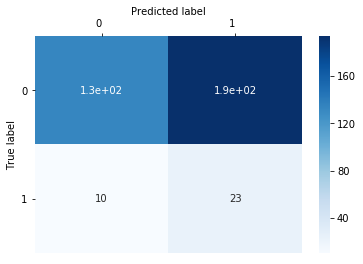

In [9]:
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

cm.yaxis.set_ticklabels(cm.yaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.set_ticklabels(cm.xaxis.get_ticklabels(), rotation=0, ha='right')
cm.xaxis.tick_top()
cm.xaxis.set_label_position('top')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

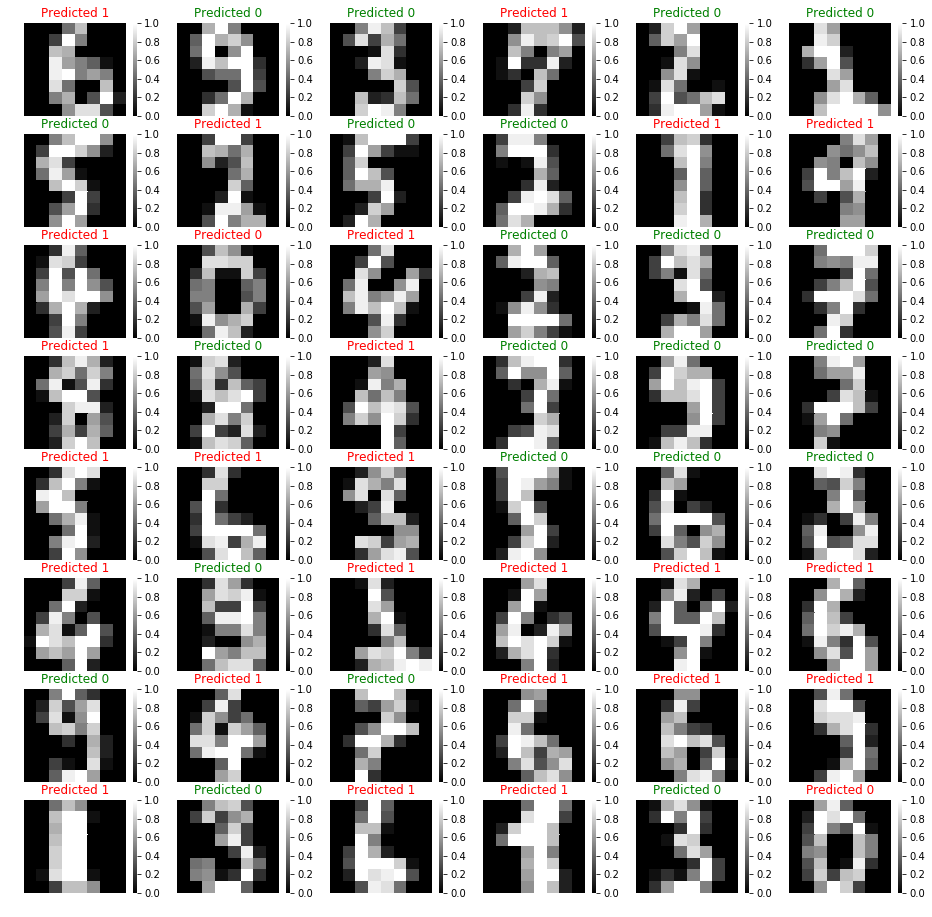

In [10]:
n_rows = 8
n_cols = 6
n_total = n_rows * n_cols
n_total = min(n_total, N)

width_ratio = 2.7
height_ratio = 2

figsize = (int(width_ratio * n_cols), int(height_ratio * n_rows))

fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
axes = axes.ravel()

for ax, image, expected, actual in zip(axes, X_test[:n_total], y_test[:n_total], y_pred[:n_total]):
    sns.heatmap(image, vmin=0.0, vmax=1.0, cmap='gray', ax=ax)
    ax.set_axis_off()

    color = 'green' if expected == actual else 'red'
    ax.set_title('Predicted %d' % actual, color=color)

plt.show()

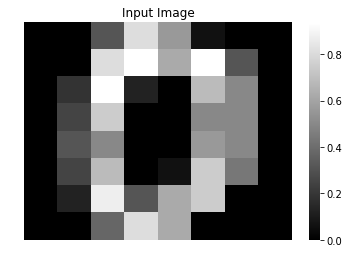

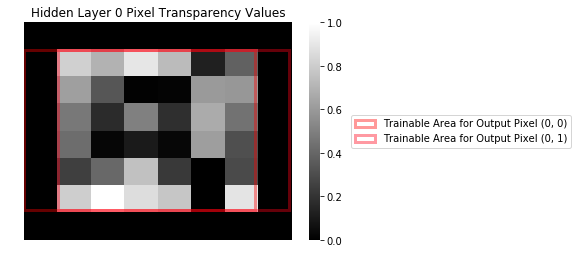

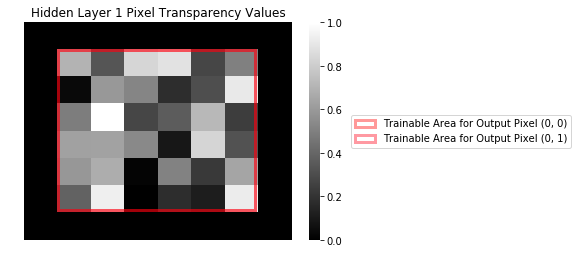

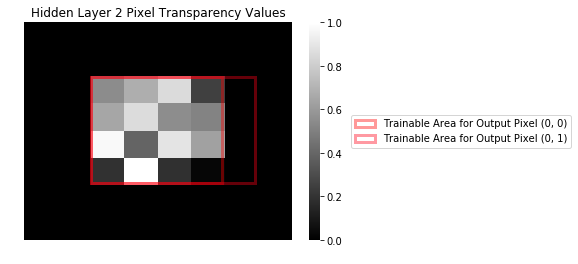

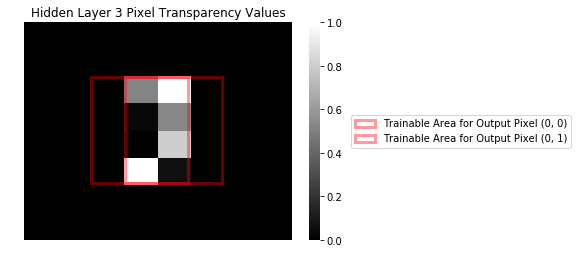

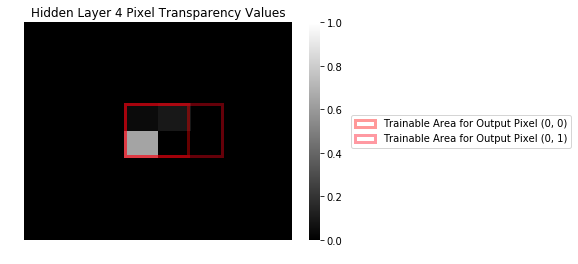

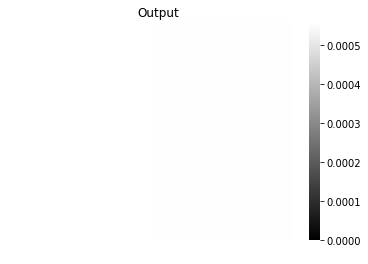

In [11]:
colors = plt.cm.hsv(np.linspace(0,1,clf.output_layer.n_rows * clf.output_layer.n_cols))
        
ax = sns.heatmap(X[0], cmap='gray')
ax.set(title='Input Image')
ax.set_axis_off()
plt.show()

for i, layer in enumerate(clf.hidden_layers):              
    ax = sns.heatmap(layer.pixel_values, vmin=0, vmax=1, cmap='gray')
        
    for row in range(clf.output_layer.n_rows):
        for col in range(clf.output_layer.n_cols):
            trained_pixels = clf.grid_W_map[row][col][i].keys() 

            min_extent = clf.layer_shape
            max_extent = (0, 0)

            for grid_coord in trained_pixels:
                grid_row, grid_col = grid_coord

                if grid_row < min_extent[0]:
                    min_extent = (grid_row, min_extent[1])

                if grid_row > max_extent[0]:
                    max_extent = (grid_row, max_extent[1])

                if grid_col < min_extent[1]:
                    min_extent = (min_extent[0], grid_col)

                if grid_col > max_extent[1]:
                    max_extent = (max_extent[0], grid_col)

            height = (max_extent[0] - min_extent[0]) + 0.9
            width = (max_extent[1] - min_extent[1]) + 0.9
            
            rect = patches.Rectangle((min_extent[1], min_extent[0]), width, height, 
                                     linewidth=3, alpha=0.4, edgecolor=colors[col], facecolor='none', 
                                     label='Trainable Area for Output Pixel (%d, %d)' % (row, col))

            ax.add_patch(rect)
            
        ax.set_axis_off()
        ax.set(title='Hidden Layer %d Pixel Transparency Values' % i)
        ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
        plt.show()
        
ax = sns.heatmap(clf.predict_proba(X).detach().numpy()[0].reshape(1, -1), vmin=0, cmap='gray')
ax.set(title='Output')
ax.set_axis_off()
plt.show()